## 3 observable trends

- All scatterplots appear symmetrical for the bandwith between -40 and 40 degrees Latitude, with more results in the 40+ degrees Latitude. With a randomly drawn sample, statistically there will be more data points above 40 than below -40. This is because there simply are more cities north of the equator compared to south of it, so there's a larger pool to pull from
- The northern hemisphere seems windier according to this sample
- Cloudiness and Humidity do not show a strong correlation, which one could expect to see

In [57]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import os
import scipy.stats as st
from citipy import citipy
from Api_keys import api_key_OpenWeather


In [2]:
latitude_range = (-90,90)
longitude_range = (-180,180)
latlongs_list = []
cities = []


In [3]:
lats = np.random.uniform(low=-90, high=90, size=2000)
lngs = np.random.uniform(low=-180, high=180, size=2000)
latlongs_list = zip(lats, lngs)

for latlong in latlongs_list:
    city = citipy.nearest_city(latlong[0], latlong[1]).city_name
    city = city.replace(" ", "%20")
    
    if city not in cities:
        cities.append(city)
        

In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []


In [5]:
query_url = "http://api.openweathermap.org/data/2.5/weather?q="

print("Printing record log:")
print("--------------------------")

record_counter = 1

for city in cities:
    try: 
        response = requests.get(f"{query_url}{city}&units=Metric&appid={api_key_OpenWeather}").json()
        
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])

        city_record = response["name"]
        print(f"Processing record nr. {record_counter}: {city_record}")
        record_counter += 1

        time.sleep(1.01)

    except:
        print("City not found. Processing next record.")

print("--------------------------")
print("Processing complete.")


rd nr. 168: Bonthe
Processing record nr. 169: Klaksvík
Processing record nr. 170: Springbok
Processing record nr. 171: Troy
Processing record nr. 172: Hamilton
Processing record nr. 173: Sompeta
Processing record nr. 174: Roald
Processing record nr. 175: Sampit
Processing record nr. 176: Jardim
Processing record nr. 177: Puerto Rondón
Processing record nr. 178: Orocué
City not found. Processing next record.
Processing record nr. 179: Paramonga
Processing record nr. 180: Broome
Processing record nr. 181: Novy Urengoy
Processing record nr. 182: Havøysund
Processing record nr. 183: Livingston
Processing record nr. 184: Touros
Processing record nr. 185: Santiago del Estero
Processing record nr. 186: Parrsboro
Processing record nr. 187: Rabo de Peixe
Processing record nr. 188: Castro
Processing record nr. 189: Ataco
Processing record nr. 190: Lumut
Processing record nr. 191: Saint Paul Harbor
Processing record nr. 192: Ribeira Grande
Processing record nr. 193: Te Anau
Processing record nr. 

In [188]:
weather_dict = {
    "City": city_name_list,
    "Cloudiness":cloudiness_list, 
    "Country":country_list,
    "Date":date_list, 
    "Humidity": humidity_list,
    "Latitude":lat_list, 
    "Longitude":lng_list, 
    "Max Temp (C)": max_temp_list,
    "Wind Speed":wind_speed_list
}

weather_df = pd.DataFrame(weather_dict)

weather_df.to_csv("Output/WeatherPyOutput.csv")

weather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp (C),Wind Speed
0,Torbay,90,CA,1612258469,86,47.6666,-52.7314,-2.78,3.60
1,Alta Floresta,42,BR,1612258470,97,-9.8756,-56.0861,21.23,0.92
2,Katsuura,40,JP,1612258423,43,35.1333,140.3000,11.00,8.75
3,Vao,100,NC,1612258473,85,-22.6667,167.4833,24.25,13.65
4,Comodoro Rivadavia,0,AR,1612258474,48,-45.8667,-67.5000,19.00,2.06
...,...,...,...,...,...,...,...,...,...
669,Patti,0,IN,1612259298,49,31.2808,74.8572,22.00,3.09
670,Mountain Home,40,US,1612259337,60,43.1330,-115.6912,3.00,7.20
671,Los Llanos de Aridane,75,ES,1612259338,82,28.6585,-17.9182,18.00,3.60
672,La Rioja,20,ES,1612259340,63,42.2500,-2.5000,15.00,3.09


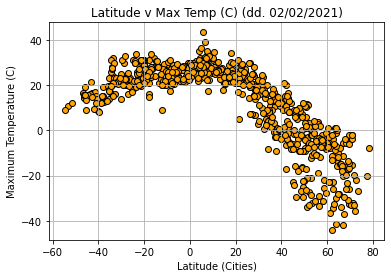

In [185]:
plt.scatter (weather_df["Latitude"], weather_df["Max Temp (C)"], color="orange", edgecolors='black')

plt.title("Latitude v Max Temp (C) (dd. 02/02/2021)")
plt.ylabel("Maximum Temperature (C)")
plt.xlabel("Latitude (Cities)")
plt.grid(True)

plt.savefig("Output/CityLatvMaxTemp.png")

# Code plots out Latitude & Maximum Temperature data, showing a trend of symmetry above ~5 degrees Celsius, with almost exclusively sub-zero maximum temperatures in the higher latitudes in the northern hemisphere.

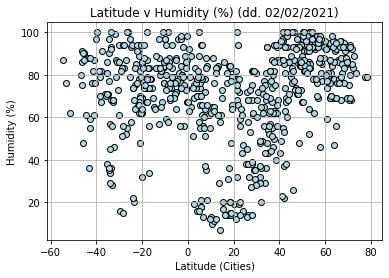

In [186]:
plt.scatter (weather_df["Latitude"], weather_df["Humidity"], color="lightblue", edgecolors='black')

plt.title("Latitude v Humidity (%) (dd. 02/02/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Cities)")
plt.grid(True)

plt.savefig("Output/CityLatvHumid.png")

# Code plots out Latitude & Humidity data. Majority of data points seemingly relatively humid (>~50%).

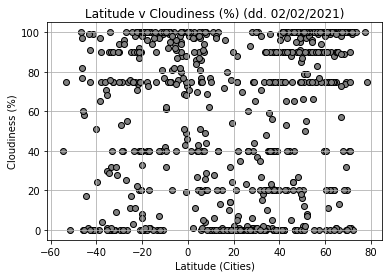

In [189]:
plt.scatter (weather_df["Latitude"], weather_df["Cloudiness"], color="gray", edgecolors='black')

plt.title("Latitude v Cloudiness (%) (dd. 02/02/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Cities)")
plt.grid(True)

plt.savefig("Output/CityLatvCloud.png")

# Code plots out Latitude & Cloudiness data. Majority of data points seemingly at both extremes of cloudiness; it looks like there's a higher chance a randomly selected data points in this sample will have either very high or very low humidity.

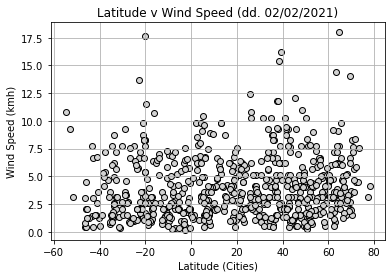

In [46]:
plt.scatter (weather_df["Latitude"], weather_df["Wind Speed"], color="lightgray", edgecolors='black')

plt.title("Latitude v Wind Speed (dd. 02/02/2021)")
plt.ylabel("Wind Speed (kmh)")
plt.xlabel("Latitude (Cities)")
plt.grid(True)

plt.savefig("Output/CityLatvWind.png")

# Code plots out Latitude & Wind Speed data

Correlation coefficient: -0.86


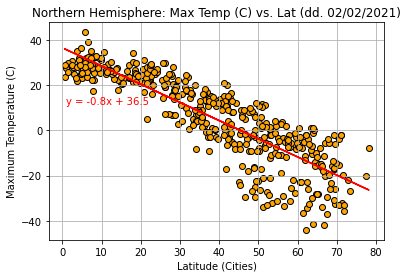

In [200]:
corr_northhemi_df = weather_df.loc[weather_df["Latitude"] >= 0]

corr_1_northhemi = round(st.pearsonr(corr_northhemi_df["Latitude"], corr_northhemi_df["Max Temp (C)"])[0],2)
print(f"Correlation coefficient: {corr_1_northhemi}")

(slope, intercept, r_xy, p_value, std_error) = st.linregress(corr_northhemi_df["Latitude"], corr_northhemi_df["Max Temp (C)"])

corr_1_northhemi_linreg = slope * corr_northhemi_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(corr_northhemi_df["Latitude"], corr_northhemi_df["Max Temp (C)"], facecolors = "orange", edgecolors='black')
plt.plot(corr_northhemi_df["Latitude"],corr_1_northhemi_linreg, "r-")

plt.annotate(line_eq, (1,11.5), color = "red")
plt.title("Northern Hemisphere: Max Temp (C) vs. Lat (dd. 02/02/2021)")
plt.xlabel("Latitude (Cities)")
plt.ylabel("Maximum Temperature (C)")
plt.grid(True)

plt.savefig("Output/CityLatvMaxTempNorth.png")

# Linear regression is modelling Max Temperatures in cities in the Northern Hemisphere. Correlation coefficient of -0.86 indicates a very strong linear relationship between the two variables; for every degree increase in latitude, maximum temperature decreases by 1 degree Celsius.

Correlation coefficient: 0.56


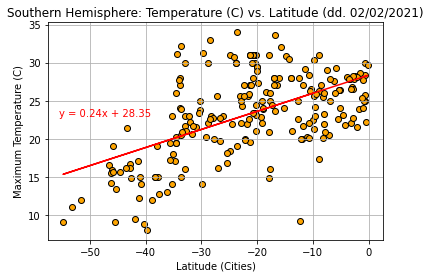

In [201]:
corr_southhemi_df = weather_df.loc[weather_df["Latitude"] < 0]

corr_1_southhemi = round(st.pearsonr(corr_southhemi_df["Latitude"], corr_southhemi_df["Max Temp (C)"])[0],2)
print(f"Correlation coefficient: {corr_1_southhemi}")

(slope, intercept, r_xy, p_value, std_error) = st.linregress(corr_southhemi_df["Latitude"], corr_southhemi_df["Max Temp (C)"])

corr_1_southhemi_linreg = slope * corr_southhemi_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(corr_southhemi_df["Latitude"], corr_southhemi_df["Max Temp (C)"], facecolors = "orange", edgecolors='black')
plt.plot(corr_southhemi_df["Latitude"],corr_1_southhemi_linreg, "r-")

plt.annotate(line_eq, (-55.5,23), color = "red")
plt.title("Southern Hemisphere: Temperature (C) vs. Latitude (dd. 02/02/2021)")
plt.xlabel("Latitude (Cities)")
plt.ylabel("Maximum Temperature (C)")
plt.grid(True)

plt.savefig("Output/CityLatvMaxTempSouth.png")

# Linear regression is modelling Max Temperatures in cities in the Southern Hemisphere. Correlation coefficient of 0.56 indicates a significant linear relationship between the two variables. It's weaker than the previous correlation coefficient, while still significant in that every two degrees decrease in latitude means one degree drop in maximum temperature.

Correlation coefficient: 0.47


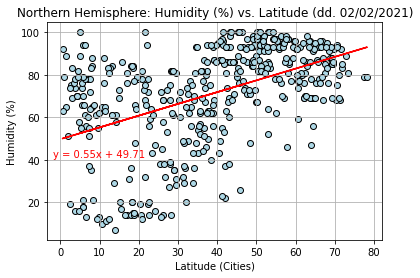

In [203]:
corr_2_northhemi = round(st.pearsonr(corr_northhemi_df["Latitude"], corr_northhemi_df["Humidity"])[0],2)
print(f"Correlation coefficient: {corr_2_northhemi}")

(slope, intercept, r_xy, p_value, std_error) = st.linregress(corr_northhemi_df["Latitude"], corr_northhemi_df["Humidity"])

corr_2_north_linreg = slope * corr_northhemi_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(corr_northhemi_df["Latitude"], corr_northhemi_df["Humidity"], color="lightblue", edgecolors='black')
plt.plot(corr_northhemi_df["Latitude"],corr_2_north_linreg, "r-")

plt.annotate(line_eq, (-2,41), color = "red")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude (dd. 02/02/2021)")
plt.xlabel("Latitude (Cities)")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Output/CityLatvHumidNorth.png")

# Linear regression is modelling Humidity in cities in the Northern Hemisphere. Correlation coefficient of 0.47 indicates a linear relationship between the two variables; for every two degrees of latitude increase there is almost one percentage humidity increase. Reflected in the scatter plot showing notably less data points in the bottom right of the graph (the area with relatively high latitude and low humidty), this makes sense as the further removed from the equator the cities are, the less arid.

Correlation coefficient: 0.16


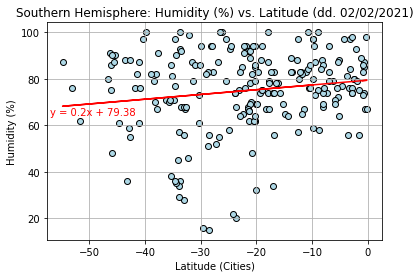

In [204]:
corr_2_southhemi = round(st.pearsonr(corr_southhemi_df["Latitude"], corr_southhemi_df["Humidity"])[0],2)
print(f"Correlation coefficient: {corr_2_southhemi}")

(slope, intercept, r_xy, p_value, std_error) = st.linregress(corr_southhemi_df["Latitude"], corr_southhemi_df["Humidity"])

corr_2_south_linreg = slope * corr_southhemi_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(corr_southhemi_df["Latitude"], corr_southhemi_df["Humidity"], color="lightblue", edgecolors='black')
plt.plot(corr_southhemi_df["Latitude"],corr_2_south_linreg, "r-")

plt.annotate(line_eq, (-57,64.5), color = "red")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude (dd. 02/02/2021)")
plt.xlabel("Latitude (Cities)")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Output/CityLatvHumidSouth.png")

# Linear regression is modelling Humidity in cities in the Southern Hemisphere. Correlation coefficient of 0.16 indicates a very weak linear relationship between the two variables. Majority of data points indicate relatively high humidity across the southern hemisphere.

Correlation coefficient: 0.3


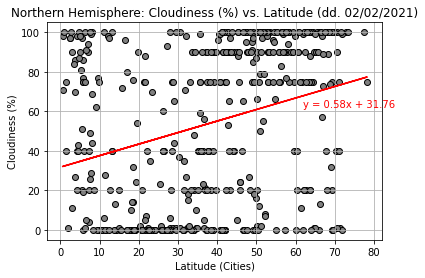

In [205]:
corr_3_northhemi = round(st.pearsonr(corr_northhemi_df["Latitude"], corr_northhemi_df["Cloudiness"])[0],2)
print(f"Correlation coefficient: {corr_3_northhemi}")

(slope, intercept, r_xy, p_value, std_error) = st.linregress(corr_northhemi_df["Latitude"], corr_northhemi_df["Cloudiness"])

corr_3_north_linreg = slope * corr_northhemi_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(corr_northhemi_df["Latitude"], corr_northhemi_df["Cloudiness"], color="gray", edgecolors='black')
plt.plot(corr_northhemi_df["Latitude"],corr_3_north_linreg, "r-")

plt.annotate(line_eq, (62,62), color = "red")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude (dd. 02/02/2021)")
plt.xlabel("Latitude (Cities)")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Output/CityLatvCloudNorth.png")

# Linear regression is modelling Cloudiness in cities in the Northern Hemisphere. Correlation coefficient of 0.3 indicates a weak linear relationship between the two variables; for about each 3 degrees of latitude increase there is almost almost 1 percentage cloudiness increase. No other observations, other than the majority of data points seemingly at both extremes of cloudiness; it looks like there's a higher chance a randomly selected data points in this sample will have either very high or very low humidity.

Correlation coefficient: 0.34


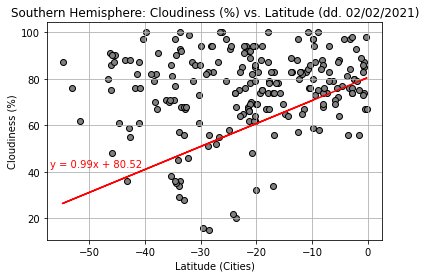

In [213]:
corr_3_southhemi = round(st.pearsonr(corr_southhemi_df["Latitude"], corr_southhemi_df["Cloudiness"])[0],2)
print(f"Correlation coefficient: {corr_3_southhemi}")

(slope, intercept, r_xy, p_value, std_error) = st.linregress(corr_southhemi_df["Latitude"], corr_southhemi_df["Cloudiness"])

corr_3_south_linreg = slope * corr_southhemi_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(corr_southhemi_df["Latitude"], corr_southhemi_df["Humidity"], color="gray", edgecolors='black')
plt.plot(corr_southhemi_df["Latitude"],corr_3_south_linreg, "r-")

plt.annotate(line_eq, (-57,42), color = "red")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude (dd. 02/02/2021)")
plt.xlabel("Latitude (Cities)")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Output/CityLatvCloudSouth.png")

# Linear regression is modelling Cloudiness in cities in the Southern Hemisphere. Correlation coefficient of 0.34 indicates a very weak linear relationship between the two variables; for about each 3 degrees of latitude increase there is almost almost 1 percentage cloudiness increase. It's almost the exact same as the previous correlation coefficient which indicates a symmetry of significance between the hemispheres. Additionally, the southern hemisphere cloudiness is more sensitive to latitude increases as humidty is, while in the northern hemisphere humidity is more sensitive.

Correlation coefficient: 0.02


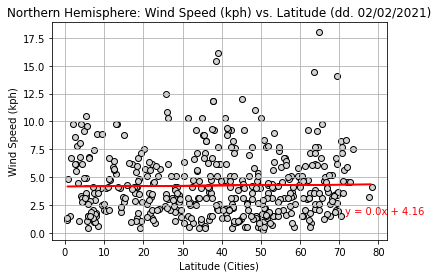

In [214]:
corr_4_northhemi = round(st.pearsonr(corr_northhemi_df["Latitude"], corr_northhemi_df["Wind Speed"])[0],2)
print(f"Correlation coefficient: {corr_4_northhemi}")

(slope, intercept, r_xy, p_value, std_error) = st.linregress(corr_northhemi_df["Latitude"], corr_northhemi_df["Wind Speed"])

corr_4_north_linreg = slope * corr_northhemi_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(corr_northhemi_df["Latitude"], corr_northhemi_df["Wind Speed"], color="lightgray", edgecolors='black')
plt.plot(corr_northhemi_df["Latitude"],corr_4_north_linreg, "r-")

plt.annotate(line_eq, (71.5,1.7), color = "red")
plt.title("Northern Hemisphere: Wind Speed (kph) vs. Latitude (dd. 02/02/2021)")
plt.xlabel("Latitude (Cities)")
plt.ylabel("Wind Speed (kph)")
plt.grid(True)

plt.savefig("Output/CityLatvWindNorth.png")

# Linear regression is modelling Wind Speed in cities in the Northern Hemisphere. Correlation coefficient of 0.02 indicates no linear relationship between the two variables. No other observations, other than the majority of data points seemingly below the 10 mph wind speed line, with almost all above this wind speed in the higher latitudes.

Correlation coefficient: -0.04


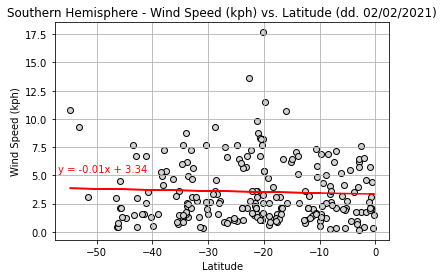

In [215]:
corr_4_southhemi = round(st.pearsonr(corr_southhemi_df["Latitude"], corr_southhemi_df["Wind Speed"])[0],2)
print(f"Correlation coefficient: {corr_4_southhemi}")

(slope, intercept, r_xy, p_value, std_error) = st.linregress(corr_southhemi_df["Latitude"], corr_southhemi_df["Wind Speed"])

corr_4_south_linreg = slope * corr_southhemi_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(corr_southhemi_df["Latitude"], corr_southhemi_df["Wind Speed"], color="lightgray", edgecolors='black')
plt.plot(corr_southhemi_df["Latitude"],corr_4_south_linreg, "r-")

plt.annotate(line_eq, (-57,5.3), color = "red")
plt.title("Southern Hemisphere - Wind Speed (kph) vs. Latitude (dd. 02/02/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid(True)

plt.savefig("Output/CityLatvWindSouth.png")

# Linear regression is modelling Wind Speed in cities in the Southern Hemisphere. Correlation coefficient of -0.04 indicates no relationship between the variables. Curiously, this correlation and the previous on wind speed in the northern hemisphere, are the exact same as Maximum Temperatures respectively for each hemisphere.